<a href="https://colab.research.google.com/github/Noob919/COVID_19-XRAY-Classification/blob/main/resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
import os
from PIL import Image

In [2]:
test_path = "/content/drive/MyDrive/chest_xray/test"
val_path = "/content/drive/MyDrive/chest_xray/val"
train_path = "/content/drive/MyDrive/chest_xray/train"

In [ ]:
os.listdir(train_path)

['PNEUMONIA', 'NORMAL']

In [ ]:
test_path_pneumonia = "/content/drive/MyDrive/chest_xray/test/PNEUMONIA"
test_path_normal = "/content/drive/MyDrive/chest_xray/test/NORMAL"

In [ ]:
train_path_pneumonia = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
train_path_normal = "/content/drive/MyDrive/chest_xray/train/NORMAL"

In [ ]:
val_path_pneumonia = "/content/drive/MyDrive/chest_xray/val/PNEUMONIA"
val_path_normal = "/content/drive/MyDrive/chest_xray/val/NORMAL"

In [ ]:
number_classes_train = { 
'Train_Normal': len(os.listdir(train_path_normal)),
'Train Pneumonia': len(os.listdir(train_path_pneumonia))
}

number_classes_val = { 
'VAL_Normal': len(os.listdir(val_path_normal)),
'VAL_Pneumonia': len(os.listdir(val_path_pneumonia))
}
number_classes_test = { 
'Test_Normal': len(os.listdir(test_path_normal)),
'Test_Pneumonia': len(os.listdir(test_path_pneumonia))
}

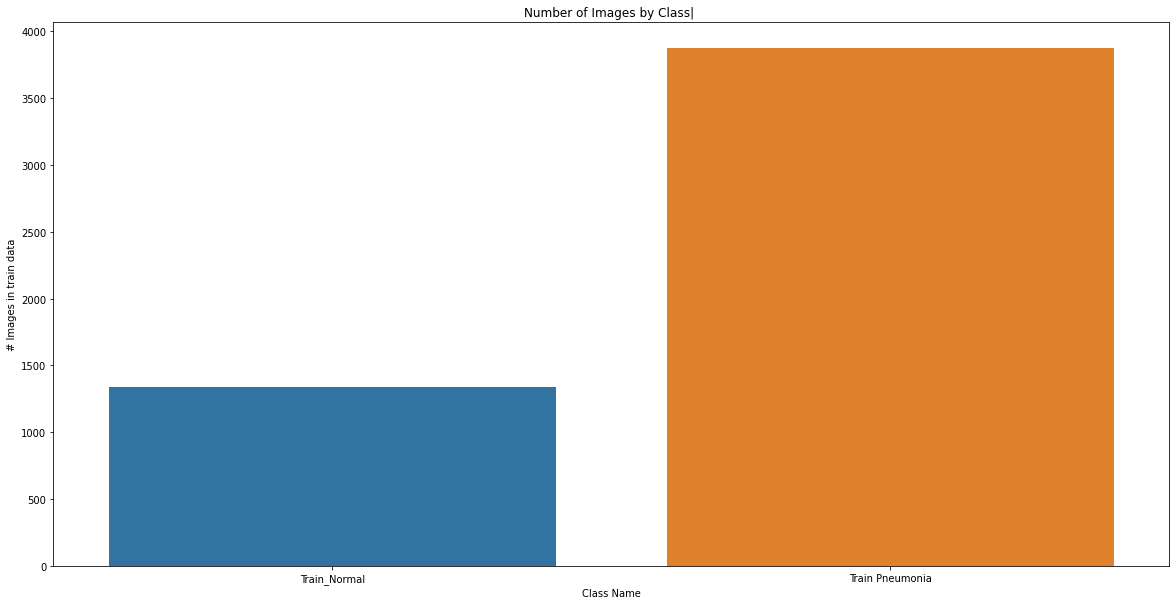

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x= list(number_classes_train.keys()), y=list(number_classes_train.values()))
plt.title("Number of Images by Class| ");
plt.xlabel('Class Name');
plt.ylabel('# Images in train data');

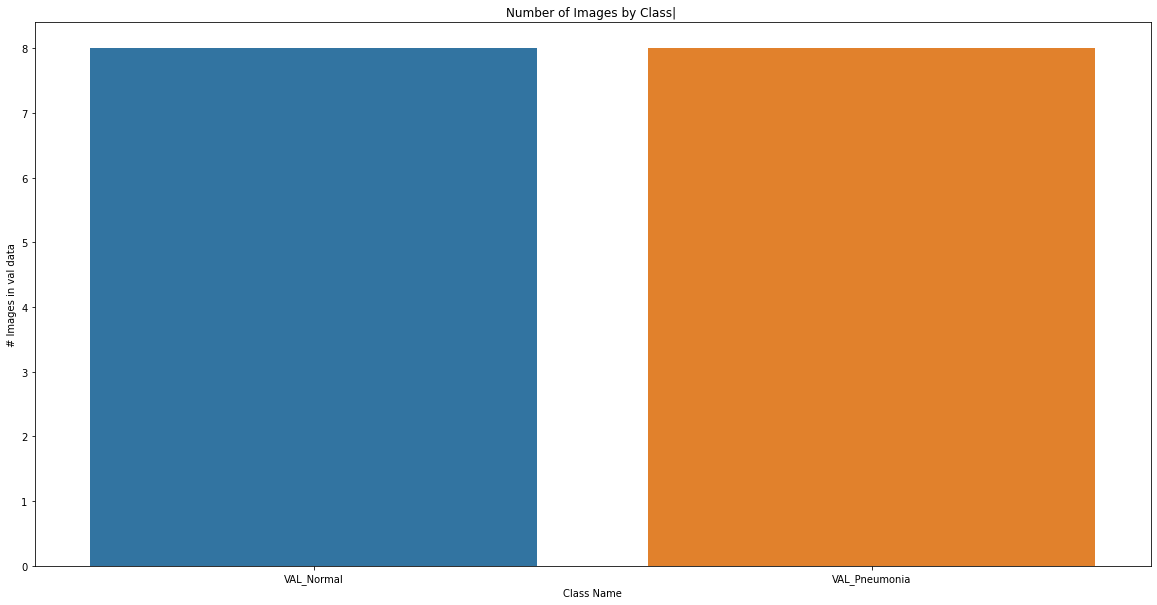

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x= list(number_classes_val.keys()), y=list(number_classes_val.values()))
plt.title("Number of Images by Class| ");
plt.xlabel('Class Name');
plt.ylabel('# Images in val data');

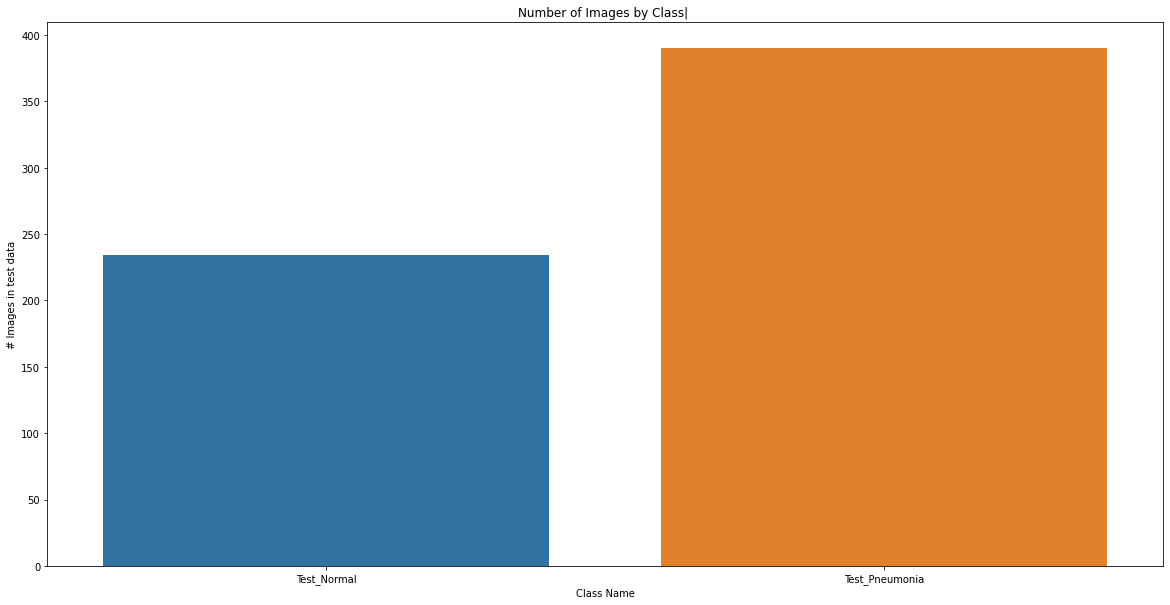

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x= list(number_classes_test.keys()), y=list(number_classes_test.values()))
plt.title("Number of Images by Class| ");
plt.xlabel('Class Name');
plt.ylabel('# Images in test data');

In [ ]:
class_pneumonia_train = []
filename_pneumonia_train = os.listdir(train_path_pneumonia)
for img_name_pneumonia in filename_pneumonia_train:
  file = os.path.join("/content/drive/MyDrive/chest_xray/train/PNEUMONIA"+"/"+ img_name_pneumonia)
  img = Image.open(file)
  size =  img.size
  class_pneumonia_train.append(size)

pneumonia_size_df_train  = pd.DataFrame(class_pneumonia_train)
pneumonia_size_df_train.columns = ['width', 'height']

In [ ]:
class_normal_train = []
filename_normal_train = os.listdir(train_path_normal)
for img_name_normal in filename_normal_train:
  file = os.path.join("/content/drive/MyDrive/chest_xray/train/NORMAL/"+ img_name_normal)
  img = Image.open(file)
  size =  img.size
  class_normal_train.append(size)

normal_size_df_train  = pd.DataFrame(class_normal_train)
normal_size_df_train.columns = ['width', 'height']

Text(0.5, 1.0, 'Image Sizes (pixels) | Class pneumonia')

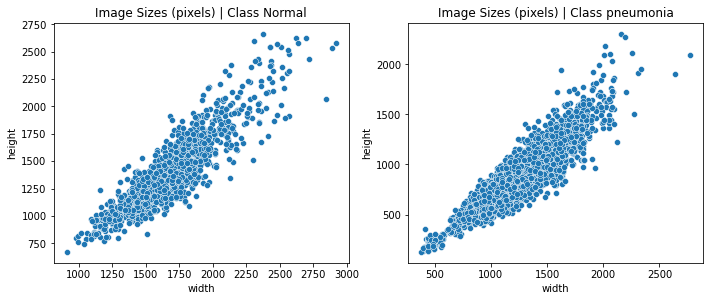

In [ ]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.scatterplot(x = normal_size_df_train['width'], y = normal_size_df_train['height'])
plt.title('Image Sizes (pixels) | Class Normal')
plt.subplot(3,3,2)
sns.scatterplot(x = pneumonia_size_df_train['width'], y = pneumonia_size_df_train['height'])
plt.title('Image Sizes (pixels) | Class pneumonia')

In [ ]:
class_normal_val = []
filename_normal_val = os.listdir(val_path_normal)
for img_name_normal in filename_normal_val:
  file = os.path.join("/content/drive/MyDrive/chest_xray/val/NORMAL/"+ img_name_normal)
  img = Image.open(file)
  size =  img.size
  class_normal_val.append(size)

normal_size_df_val  = pd.DataFrame(class_normal_val)
normal_size_df_val.columns = ['width', 'height']

class_pneumonia_val = []
filename_pneumonia_val = os.listdir(val_path_pneumonia)
for img_name_pneumonia in filename_pneumonia_val:
  file = os.path.join("/content/drive/MyDrive/chest_xray/val/PNEUMONIA"+"/"+ img_name_pneumonia)
  img = Image.open(file)
  size =  img.size
  class_pneumonia_val.append(size)

pneumonia_size_df_val  = pd.DataFrame(class_pneumonia_val)
pneumonia_size_df_val.columns = ['width', 'height']

Text(0.5, 1.0, 'Image Sizes (pixels) | Class pneumonia')

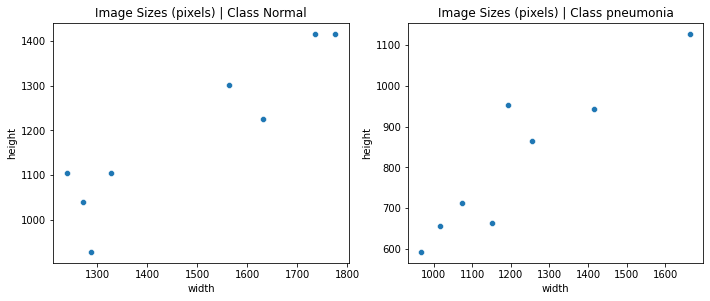

In [ ]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.scatterplot(x = normal_size_df_val['width'], y = normal_size_df_val['height'])
plt.title('Image Sizes (pixels) | Class Normal')
plt.subplot(3,3,2)
sns.scatterplot(x = pneumonia_size_df_val['width'], y = pneumonia_size_df_val['height'])
plt.title('Image Sizes (pixels) | Class pneumonia')

In [ ]:
class_normal_test = []
filename_normal_test = os.listdir(test_path_normal)
for img_name_normal in filename_normal_test:
  file = os.path.join("/content/drive/MyDrive/chest_xray/test/NORMAL/"+ img_name_normal)
  img = Image.open(file)
  size =  img.size
  class_normal_test.append(size)

normal_size_df_test  = pd.DataFrame(class_normal_test)
normal_size_df_test.columns = ['width', 'height']


class_pneumonia_test = []
filename_pneumonia_test = os.listdir(test_path_pneumonia)
for img_name_pneumonia in filename_pneumonia_test:
  file = os.path.join("/content/drive/MyDrive/chest_xray/test/PNEUMONIA"+"/"+ img_name_pneumonia)
  img = Image.open(file)
  size =  img.size
  class_pneumonia_test.append(size)

pneumonia_size_df_test  = pd.DataFrame(class_pneumonia_test)
pneumonia_size_df_test.columns = ['width', 'height']

Text(0.5, 1.0, 'Image Sizes (pixels) | Class pneumonia')

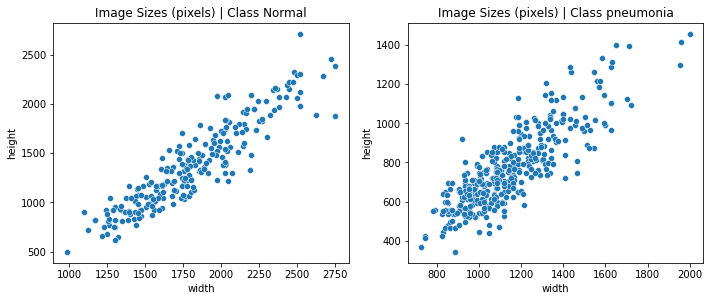

In [ ]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.scatterplot(x = normal_size_df_test['width'], y = normal_size_df_test['height'])
plt.title('Image Sizes (pixels) | Class Normal')
plt.subplot(3,3,2)
sns.scatterplot(x = pneumonia_size_df_test['width'], y = pneumonia_size_df_test['height'])
plt.title('Image Sizes (pixels) | Class pneumonia')

In [3]:
data_dir_test = "/content/drive/MyDrive/chest_xray/test"
img_height,img_width=1024,1024
batch_size=32
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=42,
  color_mode = 'grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 624 files belonging to 2 classes.


In [4]:
data_dir_val = "/content/drive/MyDrive/chest_xray/val"
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_val,
  seed=42,
  color_mode = 'grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16 files belonging to 2 classes.


In [5]:
data_dir_train = "/content/drive/MyDrive/chest_xray/train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=32,
  color_mode = 'grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.


In [6]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(1024,1024,1),
                   pooling='max',
                   classes=2,
                   weights=None)
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [7]:
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='softmax'))

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23581440  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 26,204,929
Trainable params: 2,623,489
Non-trainable params: 23,581,440
_________________________________________________________________


In [9]:
resnet_model.compile(optimizer=Adam(lr=0.0001),loss='BinaryCrossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
history = resnet_model.fit(train_ds, validation_data = test_ds, epochs=2)

Epoch 1/2
163/163 [==============================] - 322s 2s/step - loss: 0.4000 - accuracy: 0.7429 - val_loss: 0.7545 - val_accuracy: 0.5000
Epoch 2/2
163/163 [==============================] - 321s 2s/step - loss: 0.3379 - accuracy: 0.7429 - val_loss: 0.4975 - val_accuracy: 0.5000


In [12]:
values = pd.DataFrame(resnet_model.history.history)

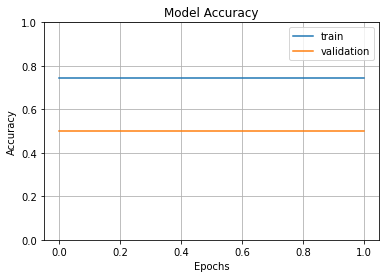

In [13]:
fig1 = plt.gcf()
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.ylim(0,1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

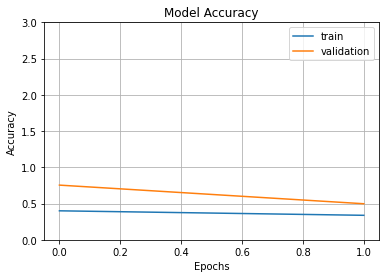

In [14]:
fig1 = plt.gcf()
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.ylim(0,3)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()